### 071人間関係の可視化

In [1]:
# preparation
import pandas as pd
df_links = pd.read_csv('sample/08ch/links.csv')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# グラフィックオブジェクトの作成
G = nx.Graph()

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


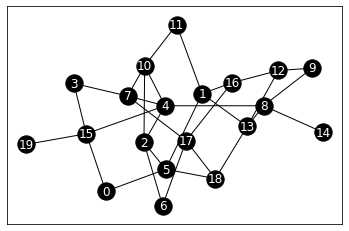

In [3]:
# 頂点の設定
NUM = len(df_links.index)
for i in range(1, NUM+1):
    node_no = df_links.columns[i].strip('Node')
    #print(node_no)
    G.add_node(str(node_no))
    
# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        #print(i,j)
        node_name = 'Node' + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))
            
# 描画
nx.draw_networkx(G, node_color='k', edge_color='k', font_color='w')
plt.show()

### 072口コミによる情報伝達の可視化

In [4]:
# preparation
import numpy as np

In [5]:
# 口コミを伝播させるか関数
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [6]:
# 口コミをシュミレートする関数
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = 'Node' + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

In [7]:
percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [8]:
def active_node_coloring(list_active):
    #print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append('r')
        else:
            list_color.append('k')
    #print(len(list_color))
    return list_color

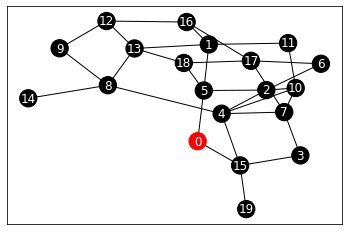

In [9]:
t = 0
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

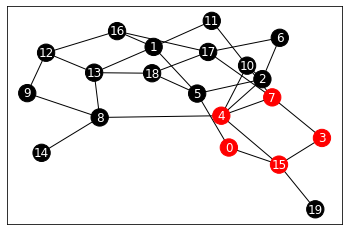

In [10]:
t = 11
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

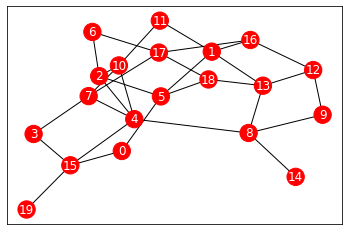

In [11]:
t = 35
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

### 073口コミ数の時系列変化をグラフ化

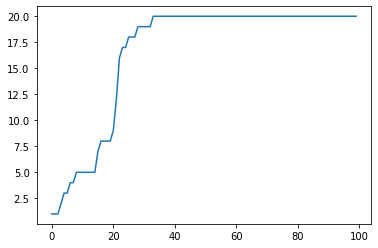

In [12]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

### 074会員数の時系列変化のシュミレーション

In [13]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
    # 拡散 #
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    # 消滅 #
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

In [14]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

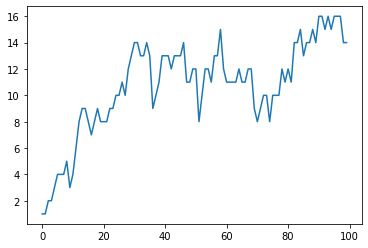

In [15]:
# 時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

In [16]:
percent_percolation = 0.1
percent_disapparence = 0.2
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

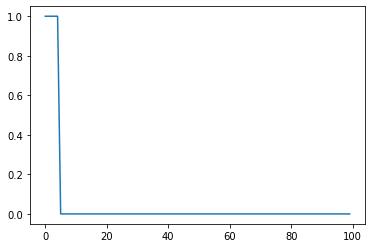

In [17]:
# 口コミの消滅
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

### 075パラメータの関係を「相図」で把握する 

In [18]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
            phaseDiagram[i_p][i_d] = sum(list_active)

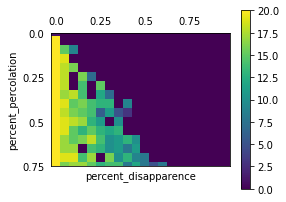

In [19]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)
plt.show()

### 076実データの読み込み

In [20]:
df_mem_links = pd.read_csv('sample/08ch/links_members.csv')
df_mem_info = pd.read_csv('sample/08ch/info_members.csv')

### 077リンク数の分布の可視化

In [21]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links['Node'+str(i)])

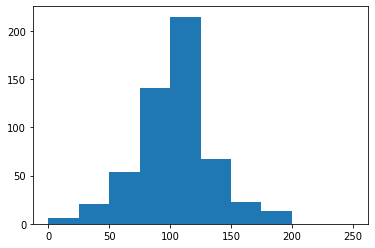

In [22]:
plt.hist(array_linkNum, bins=10, range=(0, 250))
plt.show()

### 078シュミレーションするために実データからパラメータの推定

In [23]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1
# 消滅の確率推定 #
count_active = 0
count_active_to_inactive = 0
for t in range(1, T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i][t+1]==0):
                count_active += 1
estimated_percernt_disapparence = count_active/count_active_to_inactive

In [24]:
# 拡散の確率推定 #
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links['Node'+str(df_link_t.index[i])]==1]
        for j in range(len(df_link_temp.index)):
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link += 1
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    if (temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]] = 1
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

In [25]:
print(estimated_percernt_disapparence)
print(estimated_percent_percolation)

0.10147163541419416
0.025184661323275185


### 079実データとシュミレーションの比較

In [ ]:
percent_percolation = 0.02518466132375185
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = ('real'))
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()

### 080将来予測のシュミレーション

In [ ]:
percent_percolation = 0.02518466132375185
percent_disapparence = 0.10147163541419416
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
    list_timeSeries.append(list_active.copy())

In [ ]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [ ]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = ('real'))
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.show()